# Part II - (Prosper's Loan Data Exploration)
## by (Azukaego Uzoagozie Umeononigwe)

## Investigation Overview

> From the exploration, it is evident that a number of factors have impact on the estimated return and status of the loan. Negative returns were observed for loans taken for 36 months but that was not the case for 12 or 60 months loans. This was evident during the exploration done between estimated return and term.

> In addition the highest estimated returns were also observed for loans within the 36 months payback period

> Also a direct relationship was obeserved between borrower rate and borrower apr. borrower apr increased simultaneously as borrower rate increased


## Dataset Overview

> The dataset discusses loan data gotten from Propser. A total of 113,937 loans with 81 features for each loan was provided for the data exploration. These features are not limited to the actual loan that was taken, the estimated return, the interest rate, the loan duration, etc

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

# Column headers capitalization
loan.columns = loan.columns.str.capitalize()

## 1. Distribution of Loan status

> The current loan status has the highest frequency and the least is the cancelled loans

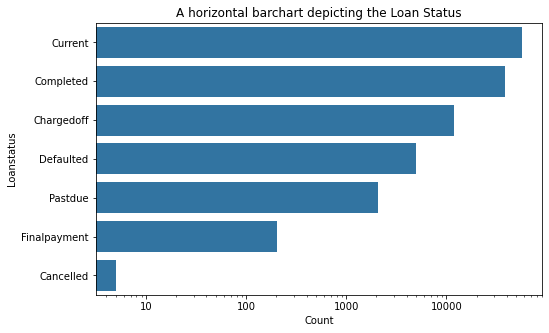

In [3]:
# Lump all past due categories into one being 'Pastdue'
# Replace FinalPaymentInProgress

loan['Loanstatus'] = loan['Loanstatus'].replace(['Past Due (1-15 days)', 'Past Due (16-30 days)',
                                                 'Past Due (61-90 days)', 'Past Due (31-60 days)',
                                                 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                                                'Pastdue').str.replace('FinalPaymentInProgress', 'Finalpayment')

# plotting a horizontal barchart

plt.figure(figsize = [8,5])
color_base = sb.color_palette()[0]

# Ordering the bars in decreasing order
orders = loan['Loanstatus'].value_counts().index
sb.countplot(data = loan, y = 'Loanstatus', color = color_base, order = orders);

# Scale Transformation
plt.xscale('log')
ticks = [10, 100, 1000, 10000]
label = ['{}'.format (v) for v in ticks]
plt.xticks(ticks, label)

# Labelling the chart
plt.xlabel('Count')
plt.ylabel('Loanstatus')
plt.title('A horizontal barchart depicting the Loan Status');

## 2. Distribution of Estimated Return
> The estimated return is skewed to the left.
> Axis transformation was done in other to have a clear picture of the distribution

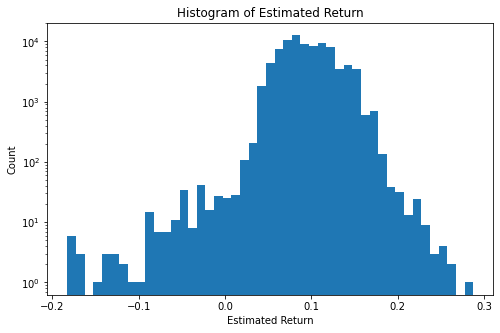

In [4]:
# Count axis (Y Axis) tranformation for better exploration and clarity
bin = np.arange(loan['Estimatedreturn'].min(), loan['Estimatedreturn'].max()+0.01, 0.01)

plt.figure(figsize = [8,5])
plt.hist(data = loan, x = 'Estimatedreturn', bins = bin);
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Histogram of Estimated Return');
plt.yscale('log');

## 3. Distribution of Loan Status across Income Range

> There were more current loans across all income ranges except 1-24.99k which has a higher loan completion rate

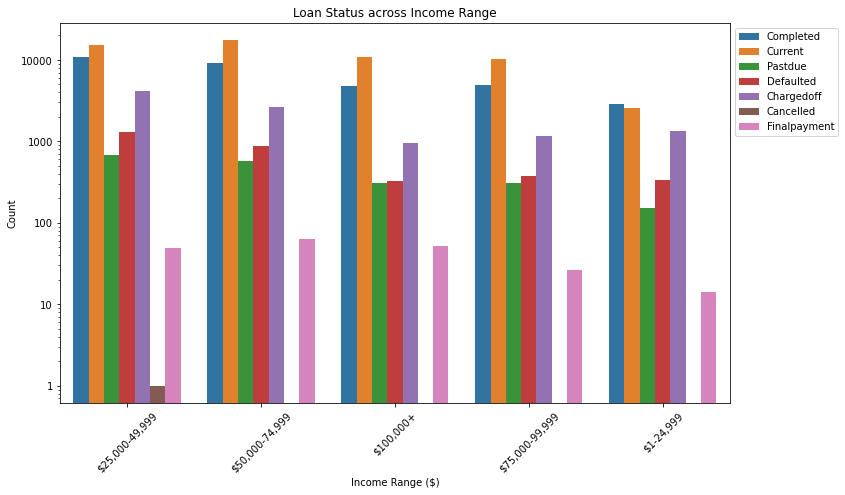

In [11]:
loan['Incomerange'] = loan['Incomerange'].replace(['Not displayed', 'Not employed', '$0'], np.nan)

plt.figure(figsize = [12,7])

# Scale transformed Chart
sb.countplot(data = loan, x = 'Incomerange', hue = 'Loanstatus');

plt.yscale('log')
tick = [1, 10, 100, 1000, 10000]
label = ['{}'.format (v) for v in tick]
plt.yticks(tick, label)
plt.xticks (rotation = 45)
plt.xlabel('Income Range ($)')
plt.ylabel ('Count');
plt.title('Loan Status across Income Range')
plt.legend(bbox_to_anchor=(1.0, 1.0));

## 4. Correlation of Estimated Return and Loan Original Amount by Term

> The main focus is the impact of the term of the loan on Estimated return but with a possible assessment of the impact of the loan original amount.

> A scatter plot was used to generate the insight

> It is evident that negative estimated returns occured for loans taken for 36 months and particularly loans of smaller amount. Loans that were taken for 12 or 60 months all experienced positive returns which is a good insight for investment.


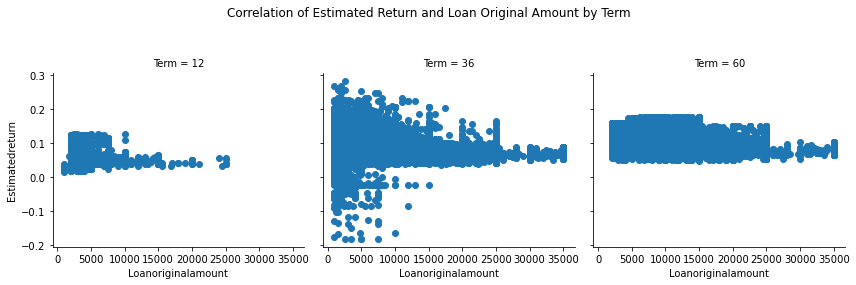

In [6]:
g = sb.FacetGrid(data = loan, col = 'Term', height = 4)
g.map(plt.scatter, 'Loanoriginalamount', 'Estimatedreturn');

g.fig.suptitle('Correlation of Estimated Return and Loan Original Amount by Term');
g.fig.subplots_adjust(top = 0.75);

In [ ]:
!jupyter nbconvert Prosper_Loan_Dataset_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt